In [14]:
# My Initial Imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [15]:
# Load .env environment variiables
from dotenv import load_dotenv
load_dotenv('C:/Users/chefd/OneDrive/Desktop/keys/.env.txt')

True

In [16]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [17]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [18]:
# Fetch current BTC price
fetch_btc=requests.get(btc_url).json()
btc_current_price = fetch_btc['data']['1']['quotes']['CAD']['price']


# Fetch current ETH price
fetch_eth=requests.get(eth_url).json()
eth_current_price = fetch_eth['data']['1027']['quotes']['CAD']['price']

print(f"The current price of BTC is   ${btc_current_price:0.2f}")
print(f"The current price of ETH is   ${eth_current_price:0.2f}")

The current price of BTC is   $27421.91
The current price of ETH is   $1572.19


In [22]:
# showing dump data where values were retrieved 
print(json.dumps(fetch_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19078437,
            "total_supply": 19078437,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 21254.0,
                    "volume_24h": 16211089784,
                    "market_cap": 406382369102,
                    "percentage_change_1h": -0.459556871408425,
                    "percentage_change_24h": -1.84948295826784,
                    "percentage_change_7d": 3.59598149577165,
                    "percent_change_1h": -0.459556871408425,
                    "percent_change_24h": -1.84948295826784,
                    "percent_change_7d": 3.59598149577165
                },
                "CAD": {
                    "price": 27421.9108,
                    "volume_24h": 20915548039.3168,
                   

In [23]:
# showing dump data where values were retrieved 
print(json.dumps(fetch_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 121320559,
            "total_supply": 121320559,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1218.56,
                    "volume_24h": 11544137598,
                    "market_cap": 148161664510,
                    "percentage_change_1h": -0.436492296175648,
                    "percentage_change_24h": -3.47886285474671,
                    "percentage_change_7d": 8.24411653790025,
                    "percent_change_1h": -0.436492296175648,
                    "percent_change_24h": -3.47886285474671,
                    "percent_change_7d": 8.24411653790025
                },
                "CAD": {
                    "price": 1572.186112,
                    "volume_24h": 14894246328.9396,
               

In [24]:
# Compute current value of my crpto
btc_value = my_btc * btc_current_price
eth_value = my_eth * eth_current_price

print(f"The current value of your {my_btc} BTC is  ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is  ${eth_value:0.2f}")

The current value of your 1.2 BTC is  $32906.29
The current value of your 5.3 ETH is  $8332.59


In [56]:
# Value of combined shares of btc and eth
combined_crypto_value = btc_value + eth_value


print(f"The current value of your Coins is ${combined_crypto_value:0.2f}")

The current value of your Coins is $41238.88


In [26]:
#  Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [41]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [42]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [43]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [44]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [45]:
# Format current date as ISO format
today = pd.Timestamp("2022-06-22", tz="America/New_York").isoformat()

In [46]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [47]:
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [48]:
# Get current closing prices for AGG and SPY
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

In [49]:
# Get closing prices for AGG and SPY from the last year
df_portfolio_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today,
).df

# Display sample data
df_portfolio_year.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-06-22 04:00:00+00:00,100.67,100.9296,100.665,100.79,9430887,30103,100.802688,AGG
2022-06-22 04:00:00+00:00,370.68,378.7200,370.180,374.39,89625876,604343,375.146941,SPY


In [50]:
# Reorganize the DataFrame

# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2022-06-22 04:00:00+00:00  100.67  100.9296  100.665  100.79  9430887   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-06-22 04:00:00+00:00       30103  100.802688  370.68  378.72  370.18   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-22 04:00:00+00:00  374.39  89625876      604343  375.146941

In [51]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.79
Current SPY closing price: $374.39


In [52]:
# Compute the current USD value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price


# Compute the current value of shares
# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $20158.00
The current value of your 50 SPY shares is $18719.50


In [53]:
# Value of combined shares of AGG and SPY
shares = my_spy_value + my_agg_value

print(f"The current value of your Shares is ${shares:0.2f}")

The current value of your Shares is $38877.50


In [54]:
# Savings Health Analysis

In [85]:
# Set monthly household income
monthly_household_income = 12000

In [86]:
# Consolidate financial assets data
consolidated_assests = combined_crypto_value + shares
print(f"Consolidated assets are, ${consolidated_assests:0.2f}")

Consolidated assets are, $80116.38


In [87]:
# Create savings DataFrame
investments_data = {"amount": [combined_crypto_value, shares]}
investments = ["CRYPTO CURRENCY", "SHARES"]

In [88]:
df_savings = pd.DataFrame(investments_data,)
df_savings

,amount
0,41238.879354
1,38877.500000


In [89]:
df_savings = pd.DataFrame(investments_data, index=investments)
df_savings

,amount
CRYPTO CURRENCY,41238.879354
SHARES,38877.500000


<AxesSubplot:ylabel='amount'>

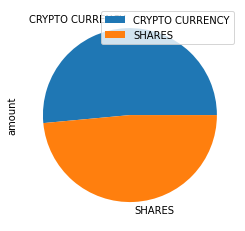

In [90]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [94]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3
print(f"Ideal emergency fund needed ${emergency_fund}")


Ideal emergency fund needed $36000


In [95]:
consolidated_assests = combined_crypto_value + shares
print(f"Consolidated assets are, ${consolidated_assests:0.2f}")

Consolidated assets are, $80116.38


In [97]:
if consolidated_assests > emergency_fund:
    print ("Congratulations! You have enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.
